In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import time
from sklearn.linear_model import LinearRegression
import math

In [2]:
def buildP(s):
    i = 1
    j = 0
    n = len(s)
    p = [0 for i in range(n+1)]
    while i < n:
        if s[i] == s[j]:
            p[i + 1] = j + 1
            i += 1
            j += 1
        else:
            if j > 0:
                j = p[j]
            else:
                p[i + 1] = 0
                i += 1
    return p

In [3]:
def KMP_matcher(s, subs):
    i, j = 0, 0
    n, m = len(s), len(subs)
    p = buildP(subs)
    while i < n and j < m:
        if s[i] == subs[j]:
            i += 1
            j += 1
        else:
            if j > 0:
                j = p[j]
            else:
                i += 1
    if j == m:
        return (i - m, i)
    else:
        return -1

In [4]:
def simlest_matching(s, subs):
    for i in range(len(s) - len(subs)+1):
        for j in range(len(subs)):
            if s[i+j] != subs[j]:
                break
            if j == len(subs)-1:
                return (i, i+j)
    return -1

In [5]:
def create_string(n):
    str_array = np.random.randint(0, 2, n)
    string = ''.join([str(x) for x in str_array])
    return string

In [6]:
def time_measure(f, n, m, repeats = 5):
    all_time = 0
    for i in range(repeats):
        string = create_string(n)
        substring = create_string(m)
        start = time.perf_counter()
        f(string, substring)
        all_time += (time.perf_counter() - start)
    return  all_time / repeats

In [7]:
def get_fit(n, exper_time, fit_func, label_func = 'Teoretical fitting'):
    X = fit_func(n).reshape((len(n), 1))
    predict = LinearRegression().fit(X, exper_time).predict(X)
    
    plt.figure(figsize=(7, 7))
    plt.scatter(n, exper_time * 1e3,  label='Experimental calculation')
    plt.plot(n, predict * 1e3,  linewidth=4, color = 'orange', label = label_func )
    plt.xlabel("Input size", **axis_font)
    plt.ylabel("Average execution time ($ms$)", **axis_font)
    plt.legend(loc="upper left")

    return predict

In [8]:
axis_font = {'fontname':'Arial', 'size':'20'}
title_font = {'fontname':'Arial', 'size':'20'}

Wall time: 7.11 s


Text(0.5, 0, 'n+m')

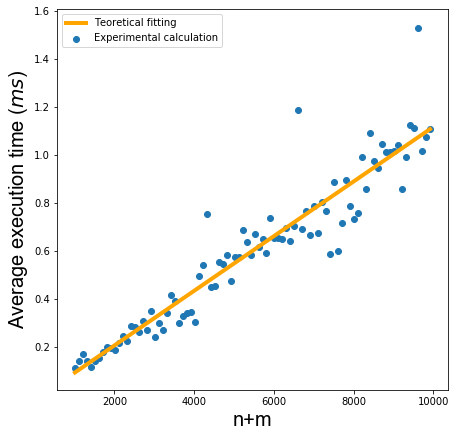

In [86]:
%%time
n_list = list(range(1000, 10000, 100))
m_list = []
time_list = []
for n in n_list:
    len_substring = int(math.log(n, 2) + 1)
    m_list.append(len_substring)
    time_list.append(time_measure(KMP_matcher, n, len_substring, repeats = 25))

predict = get_fit(np.array(n_list)+np.array(m_list), np.array(time_list), lambda x: x)
plt.xlabel("n+m", **axis_font)


Wall time: 9.08 s


Text(0.5, 0, 'n*m')

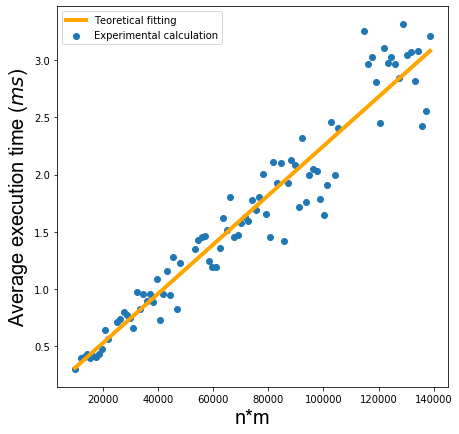

In [98]:
%%time
n_list = list(range(1000, 10000, 100))
m_list = []
time_list = []
for n in n_list:
    len_substring = int(math.log(n, 2) + 1)
    m_list.append(len_substring)
    time_list.append(time_measure(simlest_matching, n, len_substring, repeats = 25))

predict = get_fit(np.array(n_list)*np.array(m_list), np.array(time_list), lambda x: x)
plt.xlabel("n*m", **axis_font)

In [9]:
#generation of random adjacency matrix
def adj_matrix(num_vert, num_edg, high):
    matrix = np.zeros((num_vert, num_vert))
    num_uniq_elem = (num_vert**2 - num_vert) // 2
    edg = [np.random.randint(1, high) if x < num_edg else 0 for x in range(num_uniq_elem)]
    random.shuffle(edg)
    n = 0
    for i in range(1, num_vert):
        for j in range(i):
            matrix[i, j], matrix[j, i] = edg[n], edg[n]
            n += 1
    return matrix

In [10]:
class Graph:
 
    def __init__(self, vertices):
        self.V = vertices  #Number of nodes
        self.graph = []  # dictionary to store graph
 
    # add an edge to graph
    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])
 
    # A function to find set of an element i
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
 
    # A function that does union of two sets of x and y
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
 
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
 
    # Kruskal's algorithm
    def KruskalMST(self):
        result = [] 
         
        i = 0
        e = 0

        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []
 
        for node in range(self.V):
            parent.append(node)
            rank.append(0)

        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
 
        minimumCost = 0
        for u, v, weight in result:
            minimumCost += weight

        return(minimumCost)
 

In [11]:
def matrix_to_graph(matrix):
    l = len(matrix)
    G = Graph(l)
    for i in range(l):
        for j in range(l):
            if matrix[i, j] !=0:
                G.add_edge(i, j, matrix[i, j])
    return G

In [12]:
def graph_time_measure(f, x, repeats = 5):
    start = time.perf_counter()
    for i in range(repeats):
        f(*x)
    return (time.perf_counter() - start) / repeats

Wall time: 2min 10s


Text(0.5, 0, '$(E \\log E + E \\log V) \\cdot 10^{-6}$')

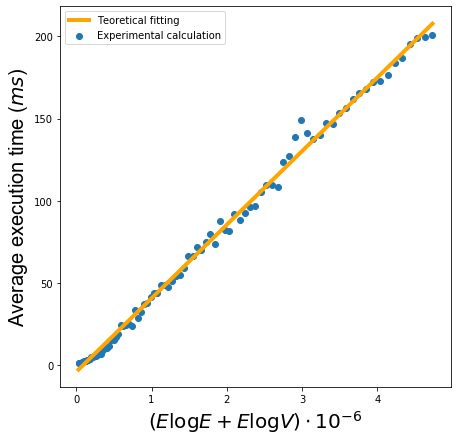

In [15]:
%%time
n_vert_list = np.array(range(100, 1000, 10))
n_edges_list = []
time_list = []
for n_vert in n_vert_list:
    n_edges = n_vert**2 / 4
    n_edges_list.append(n_edges)
    matix = adj_matrix(n_vert, n_edges, 100)
    G = matrix_to_graph(matix)
    start = time.perf_counter()
    for i in range(5):
        G.KruskalMST()
    time_list.append((time.perf_counter() - start) / 5)

n_edges_list = np.array(n_edges_list)    
x = n_edges_list * np.log(n_edges_list) + n_edges_list * np.log(n_vert_list)
predict = get_fit(x / 1e6, np.array(time_list), lambda x: x)
plt.xlabel("$(E \log E + E \log V) \cdot 10^{-6}$", **axis_font)